### Numpy

In [2]:
import numpy as np
A=np.array([[1,2],
            [3,4]])
print(A)

[[1 2]
 [3 4]]


In [3]:
print(A*3)
print(A+A)
print(A-A)

[[ 3  6]
 [ 9 12]]
[[2 4]
 [6 8]]
[[0 0]
 [0 0]]


In [4]:
print(A**2)
print(3**A)
print(A*A)

[[ 1  4]
 [ 9 16]]
[[ 3  9]
 [27 81]]
[[ 1  4]
 [ 9 16]]


In [5]:
x=np.array([[1,2],[3,4]])
y=np.array([[3,4],[3,2]])

print(np.dot(x,y))
print(x*y)

[[ 9  8]
 [21 20]]
[[3 8]
 [9 8]]


In [6]:
a=np.array([1,2,3,4])
b=np.array([4,2,2,4])
print(a==b)

[False  True False  True]


### scikit-learn 회귀 분석 예시

#### 단순선형회귀

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

In [8]:
def loss(x, y, beta_0, beta_1):
    N = len(x)
    sum=0
    for i in range(N):
        loss=(y[i]-beta_0*x[i]-beta_1)**2
        sum+=loss
    return sum

X = [8.70153760, 3.90825773, 1.89362433, 3.28730045, 7.39333004, 2.98984649, 2.25757240, 9.84450732, 9.94589513, 5.48321616]
Y = [5.64413093, 3.75876583, 3.87233310, 4.40990425, 6.43845020, 4.02827829, 2.26105955, 7.15768995, 6.29097441, 5.19692852]

train_X = np.array(X).reshape(-1,1)
train_Y = np.array(Y)

lrmodel = LinearRegression()
lrmodel.fit(train_X, train_Y)

beta_0 = lrmodel.coef_[0]   # lrmodel로 구한 직선의 기울기
beta_1 = lrmodel.intercept_ # lrmodel로 구한 직선의 y절편

print("beta_0: %f" % beta_0)
print("beta_1: %f" % beta_1)
print("Loss: %f" % loss(X, Y, beta_0, beta_1))

beta_0: 0.430781
beta_1: 2.506181
Loss: 3.721640


(0, 10)

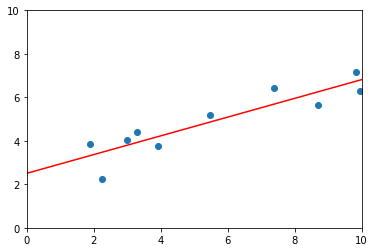

In [9]:
plt.scatter(X, Y) # (x, y) 점을 그립니다.
plt.plot([0, 10], [beta_1, 10 * beta_0 + beta_1], c='r') # y = beta_0 * x + beta_1 에 해당하는 선을 그립니다.

plt.xlim(0, 10) # 그래프의 X축을 설정합니다.
plt.ylim(0, 10) # 그래프의 Y축을 설정합니다.

#### 다중선형회귀

In [10]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [11]:
import csv
csvreader = csv.reader(open("Advertising.csv"))

x = []
y = []

next(csvreader)
for line in csvreader :
    x_i = [ float(line[1]), float(line[2]), float(line[3]) ]
    y_i = float(line[4])
    x.append(x_i)
    y.append(y_i)

X = np.array(x)
Y = np.array(y)

lrmodel = LinearRegression()
lrmodel.fit(X, Y)

beta_0 = lrmodel.coef_[0] # 0번째 변수에 대한 계수 (페이스북)
beta_1 = lrmodel.coef_[1] # 1번째 변수에 대한 계수 (TV)
beta_2 = lrmodel.coef_[2] # 2번째 변수에 대한 계수 (신문)
beta_3 = lrmodel.intercept_ # y절편 (기본 판매량)

print("beta_0: %f" % beta_0)
print("beta_1: %f" % beta_1)
print("beta_2: %f" % beta_2)
print("beta_3: %f" % beta_3)

beta_0: 0.045765
beta_1: 0.188530
beta_2: -0.001037
beta_3: 2.938889


#### 다항식 회귀

In [12]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [15]:
X_poly = []
for x_i in X:
    X_poly.append([
        x_i[0] **2 , # X_1^2
        x_i[1] ,     # X_2
        x_i[1] * x_i[2], # X_2 * X_3
        x_i[2] # X_3
    ])

# 80%는 train, 20%는 test data
x_train, x_test, y_train, y_test = train_test_split(X_poly, Y, test_size=0.2, random_state=0)

# x_train, y_train에 대해 다항식 회귀분석.
lrmodel = LinearRegression()
lrmodel.fit(x_train, y_train)

#x_train에 대해, 만든 회귀모델의 예측값을 구하고, 이 값과 y_train 의 차이를 이용해 MSE를 구함
predicted_y_train = lrmodel.predict(x_train)
mse_train = mean_squared_error(y_train, predicted_y_train)
print("MSE on train data: {}".format(mse_train))

# x_test에 대해, 만든 회귀모델의 예측값을 구하고, 이 값과 y_test 의 차이를 이용해 MSE를 구함
predicted_y_test = lrmodel.predict(x_test)
mse_test = mean_squared_error(y_test, predicted_y_test)
print("MSE on test data: {}".format(mse_test))

MSE on train data: 4.589288715884172
MSE on test data: 7.356365735074985


### 퍼셉트론 코드

In [1]:
def perceptron(x, weights):
    sum=weights[0] #bias
    for i in range(len(x)-1):
        pred+=weights[i+1]*x[i]
    return 1, 0 if pred>=0.0 else 0.0

In [2]:
import tensorflow as tf

In [11]:
tensor_a=tf.constant(5)

In [12]:
print(tensor_a)

tf.Tensor(5, shape=(), dtype=int32)


In [22]:
tensor_b=tf.zeros([2,2], dtype=tf.float32, name=None)
tensor_c=tf.ones([3,3,3], dtype=tf.float32, name=None)

In [23]:
print(tensor_b)

tf.Tensor(
[[0. 0.]
 [0. 0.]], shape=(2, 2), dtype=float32)


In [24]:
print(tensor_c)

tf.Tensor(
[[[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]], shape=(3, 3, 3), dtype=float32)


In [25]:
tensor_d=tf.range(0,limit=10, delta=2, name=None)
print(tensor_d)

tf.Tensor([0 2 4 6 8], shape=(5,), dtype=int32)


In [27]:
tensor_e=tf.random.normal(
[2,2], mean=0.0, stddev=1.0,
dtype=tf.float32, seed=0)
print(tensor_e)

tf.Tensor(
[[-0.3991576   2.1044393 ]
 [ 0.17107224  0.54651815]], shape=(2, 2), dtype=float32)


In [29]:
tensor_f=tf.Variable('seungjoo')
print(tensor_f)

<tf.Variable 'Variable:0' shape=() dtype=string, numpy=b'seungjoo'>


In [30]:
weight=tf.Variable(10) #일반적 퍼셉트론의 가중치
bias=tf.Variable(tf.random.normal([10,10])) #bias

In [33]:
x=10

tf.negative(x)   #-x
tf.logical_not(True)#!x
tf.abs(x)        #|x|
tf.add(x,2)
tf.math.pow(x,2)

<tf.Tensor: shape=(), dtype=int32, numpy=100>

In [34]:
import tensorflow as tf
import numpy as np

data=np.random.sample((100,2))
labels=np.random.sample((100,1))

dataset=tf.data.Dataset.from_tensor_slices((data,labels))
dataset=dataset.batch(32)

In [36]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, input_dim=2, activation='sigmoid'),
    tf.keras.layers.Dense(10, activation='sigmoid'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])